# Introduction to data science using case studies in Kaggle
 Kaggle is the world’s largest community of data scientists and machine learners, owned
by Google, Inc. Kaggle got its start by offering machine learning competitions
and now also offers a public data platform, a cloud-based workbench for data
science, and short form AI education. 
____
#### Getting to know your dataset
The dataset that you are going to work with relates to **Human Resources**. When a
company experiences a high rate of employee turnover (They quit!!!), then
something is going wrong. This can lead the company to huge monetary losses
by these innovative and valuable employees.

The objective of this analysis is that the company wants to understand what
factors contributed most to employee turnover and to create a model that can
predict if a certain employee will leave the company or not.

In [1]:
#import the necessary modules for data manipulaiton and visual representation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)  # import data
df.isnull().any()    # check whether there are any missing values in the dataset

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [3]:
df.head()  # viewing the first 5 lines (if no number is specified inside the (), it is automatically 5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Rename certain columns for better readability (the name is too long)

df = df.rename(columns={'satisfaction_level':'satisfaction',
                        'last_evaluation':'evaluation',
                       'number_project':'projectCount',
                       'average_montly_hours':'averageMonthlyHours',
                       'time_spend_company':'yearsAtCompany',
                       'Work_accident':'workAccident',
                       'promotion_last_5years':'promotion',
                       'sales': 'department', 'left':'turnover'})

In [5]:
# move the 'turnover' to the front of the table

front = df['turnover']
df.drop(labels=['turnover'], axis=1, inplace = True)
df.insert(0, 'turnover', front)
df.head(4)    # viewing the first 4 data

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low


#### Exploring data

In [6]:
df.shape    # size of rows and columns

(14999, 10)

In [7]:
df.dtypes   # types of each column

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [8]:
df.describe()   # basic info like mean, min, etc..

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [9]:
turnover_rate = df.turnover.value_counts() / len(df)  # calculate turnover rate
turnover_rate    # 0 = no-turnover, 1 = turnover

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [10]:
# Explore the overview of turnover vs non-turnover in terms of the mean value

turnover_summary = df.groupby('turnover')  # divide data into 2 sets (based on turnover: 0 or 1)
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


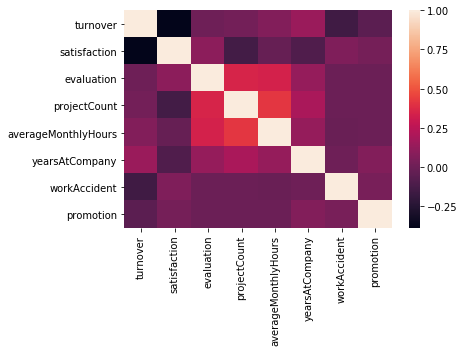

In [11]:
# Explore the statistical characteristics using diagrams (rather than just numbers)
# draw a correlation matrix and heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
corr

Positive number : directly proportional  
Negative number : inversely proportional

The higher the number (regardless of +/- sign), the highly related the 2 data are.

Text(0.5, 1.0, 'Employee Salary Turnover Distribution')

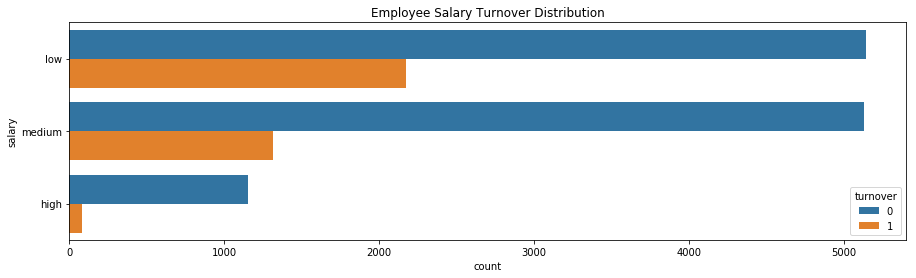

In [12]:
# draw a diagram showing the analysis between salary and turnover rate
f, ax = plt.subplots(figsize=(15,4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution')

Text(0.5, 1.0, 'Employee Department Turnover Distribution')

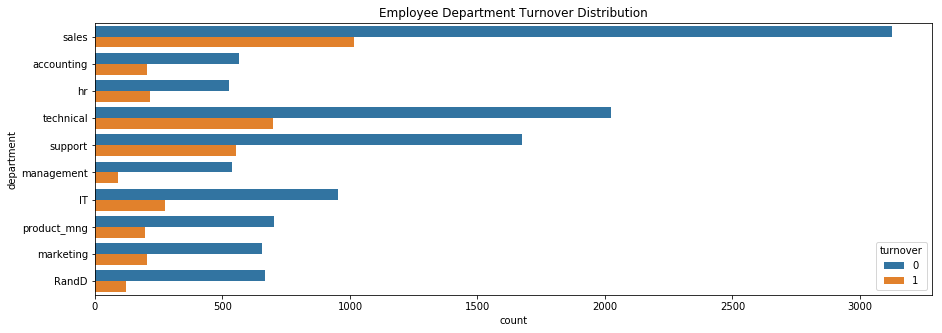

In [13]:
# more info about the departments vs turnover 

f, ax = plt.subplots(figsize=(15,5))
sns.countplot(y='department', hue='turnover', data=df).set_title('Employee Department Turnover Distribution')

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Percent')]

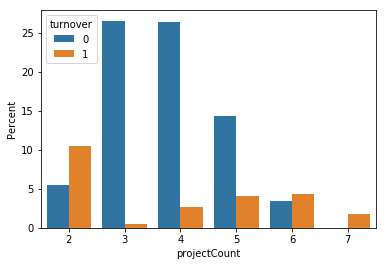

In [14]:
# draw a diagram showing the analysis between ProjectCount and turnover rate

ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100) # bar chart
ax.set(ylabel="Percent")

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

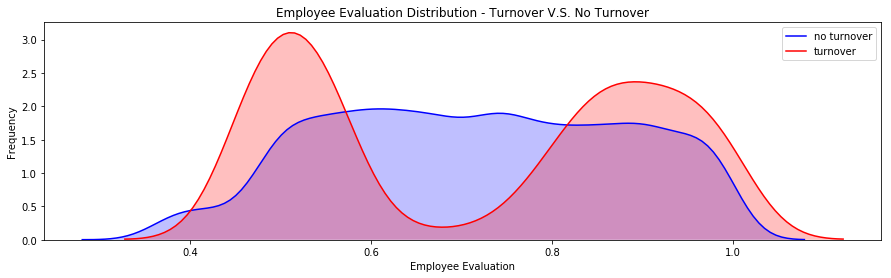

In [15]:
# Explore the correlation between the employee evaluation and turnover

fig = plt.figure(figsize=(15,4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'], color='b', shade=True, label = 'no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'evaluation'], color='r', shade=True, label='turnover')

ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Employee Average Monthly Hours Distribution - Turnover V.S. No Turnover')

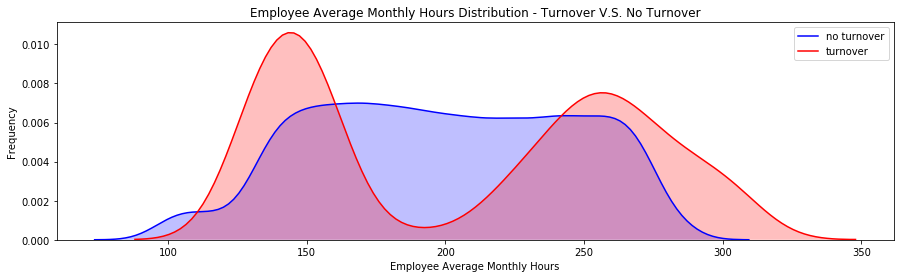

In [16]:
# Explore the correlation between the average MonthlyHours and turnover

fig = plt.figure(figsize=(15,4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'], color='b', shade=True, label = 'no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'averageMonthlyHours'], color='r', shade=True, label='turnover')

ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee Average Monthly Hours Distribution - Turnover V.S. No Turnover')

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

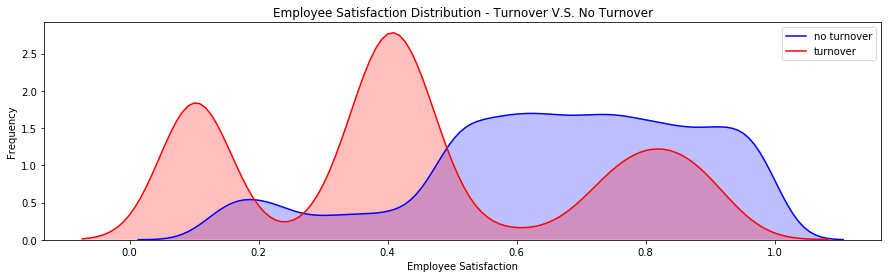

In [17]:
# Explore the correlation between the satisfaction and turnover

fig = plt.figure(figsize=(15,4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'], color='b', shade=True, label = 'no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'satisfaction'], color='r', shade=True, label='turnover')

ax.set(xlabel='Employee Satisfaction', ylabel='Frequency')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

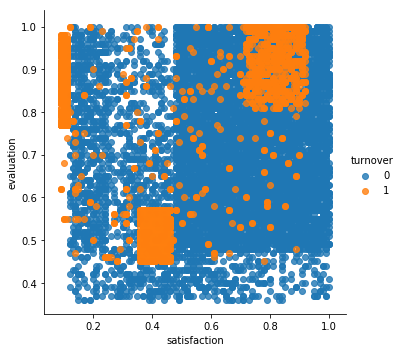

In [18]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')    # based hue/colour on turnover

### Using K-Means Clustering to analyze
As you studied K-Means Clustering from the previous lab, let use it for our
analysis. The following code applies K-Means on the **satisfaction level** and the
**evaluation** result to cluster the data into 3 clusters.

In [19]:
from sklearn.cluster import KMeans

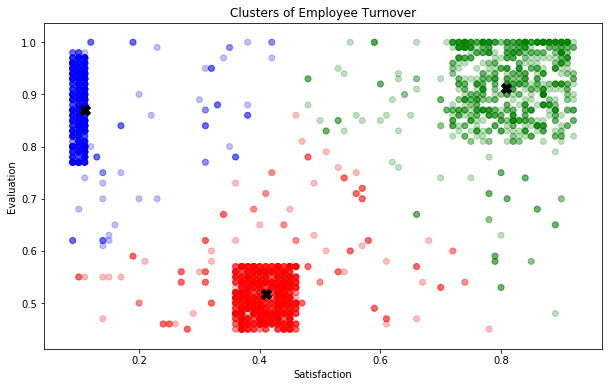

In [20]:
# applies K-Means on the satisfaction level and the evaluation result to cluster the data into 3 clusters

kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(df[df.turnover == 1][['satisfaction','evaluation']])

kmeans_colors = ['green' if c==0 else 'blue' if c==2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))

plt.scatter(x='satisfaction', y='evaluation', data=df[df.turnover==1], alpha=0.25, color=kmeans_colors)

plt.title("Clusters of Employee Turnover")
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='black', marker='X',s=100)

plt.show()

### Apply machine learning techniques to build a prediction model

Decision Tree is a supervised
learning algorithm that can be represented as a tree graph model consisted
of decision nodes and leaf nodes represented the target output (e.g. category). A
decision node is a rule that is derived based on a feature that can split most data
into their actual category. The classification of an unknown data is achieved
by passing it through the tree starting at the top and moving down until a leaf
node is reached. The value at that leaf node gives the predicted output for the
data. At each node, the branch is selected based on the value of the corresponding
feature. The significant benefit of decision tree classifier is that it offers an
explainable model. Thus, most of the work that focuses on interpretable models
selected this technique.

In [21]:
# making a Decision Tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Convert these variables into categorial variables

df['department'] = df['department'].astype('category').cat.codes
df['salary'] = df['salary'].astype('category').cat.codes

# Create train and test splits

target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(max_depth=1, class_weight='balanced', min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train, y_train)     # dtree is your trained model

Next, you are going to plot a tree structure derived from your
model using the following code.

    Note that you may need to install new packages e.g. pydotplus

You will get the file called ”dtree2.dot”. Go to `http://webgraphviz.com/` and paste the content stored in the `dtree2.dot` file to the textbox to generate the tree graph.

In [22]:
# plot a tree structure derived from your model using the following code
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dotfile = open("dtree2.dot", 'w')

tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

how the graph will look like
<img src="graph.png">

In [23]:
# try changing the parameters of the decision tree at this line
# see whether the tree graph structure changes
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_weight_fraction_leaf=0.01)